In [38]:
# Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# EMA
from ema_workbench import (Model, RealParameter,  MultiprocessingEvaluator, TimeSeriesOutcome, perform_experiments, ema_logging)
from ema_workbench import Samplers
from ema_workbench import save_results, load_results
from ema_workbench.analysis import feature_scoring
from ema_workbench.analysis.scenario_discovery_util import RuleInductionType
from ema_workbench.em_framework.salib_samplers import get_SALib_problem

# Analytical Tools
from SALib.analyze import sobol

# Model
from problem_formulation import get_model_for_problem_formulation
ema_logging.log_to_stderr(ema_logging.INFO)

<Logger EMA (DEBUG)>

### 0 Initialize Dummy Model

In [10]:
# Initialize Model
model, steps = get_model_for_problem_formulation(1)
uncertainties = model.uncertainties
levers = model.levers

# Run Model with 2000 scenarios
ema_logging.log_to_stderr(ema_logging.INFO)
with MultiprocessingEvaluator(model, n_processes=7) as evaluator:
    results = evaluator.perform_experiments(scenarios=2000, policies=1)

save_results(results, 'results/test.tar.gz')

[MainProcess/INFO] pool started with 7 workers
[MainProcess/INFO] performing 2000 scenarios * 1 policies * 1 model(s) = 2000 experiments
100%|██████████████████████████████████████| 2000/2000 [06:36<00:00,  5.05it/s]
[MainProcess/INFO] experiments finished
[MainProcess/INFO] terminating pool
[MainProcess/INFO] results saved successfully to c:\Users\ryant\Google Drive\School (TUD)\Semester 4\4_Model-based Decision-making\model-based-decision-making\final assignment\results\test.tar.gz


In [65]:
results = load_results("results/test.tar.gz")
experiments, outcomes = results

print(experiments.columns)
print(outcomes.keys())

[MainProcess/INFO] results loaded successfully from c:\Users\ryant\Google Drive\School (TUD)\Semester 4\4_Model-based Decision-making\model-based-decision-making\final assignment\results\test.tar.gz


Index(['A.0_ID flood wave shape', 'A.1_Bmax', 'A.1_Brate', 'A.1_pfail',
       'A.2_Bmax', 'A.2_Brate', 'A.2_pfail', 'A.3_Bmax', 'A.3_Brate',
       'A.3_pfail', 'A.4_Bmax', 'A.4_Brate', 'A.4_pfail', 'A.5_Bmax',
       'A.5_Brate', 'A.5_pfail', 'discount rate 0', 'discount rate 1',
       'discount rate 2', '0_RfR 0', '0_RfR 1', '0_RfR 2', '1_RfR 0',
       '1_RfR 1', '1_RfR 2', '2_RfR 0', '2_RfR 1', '2_RfR 2', '3_RfR 0',
       '3_RfR 1', '3_RfR 2', '4_RfR 0', '4_RfR 1', '4_RfR 2',
       'A.1_DikeIncrease 0', 'A.1_DikeIncrease 1', 'A.1_DikeIncrease 2',
       'A.2_DikeIncrease 0', 'A.2_DikeIncrease 1', 'A.2_DikeIncrease 2',
       'A.3_DikeIncrease 0', 'A.3_DikeIncrease 1', 'A.3_DikeIncrease 2',
       'A.4_DikeIncrease 0', 'A.4_DikeIncrease 1', 'A.4_DikeIncrease 2',
       'A.5_DikeIncrease 0', 'A.5_DikeIncrease 1', 'A.5_DikeIncrease 2',
       'EWS_DaysToThreat', 'scenario', 'policy', 'model'],
      dtype='object')
dict_keys(['Expected Annual Damage', 'Total Investment Costs', 'Ex

### 1 Global Sensivity Analysis

#### 1a Sobol

In [ ]:
from SALib.analyze import sobol
from ema_workbench import Samplers
from ema_workbench.em_framework.salib_samplers import get_SALib_problem

In [64]:
# Intialize Model
## uncertainties
## levers

# Perform Experiments 
## experiments
## outcomes

In [73]:
# Prepare Sobol Variables

problem = get_SALib_problem(uncertainties)
#problem = get_SALib_problem(levers)
outcome_var = 'Expected Number of Deaths'

Si = sobol.analyze(problem, outcomes[outcome_var], print_to_console=False)

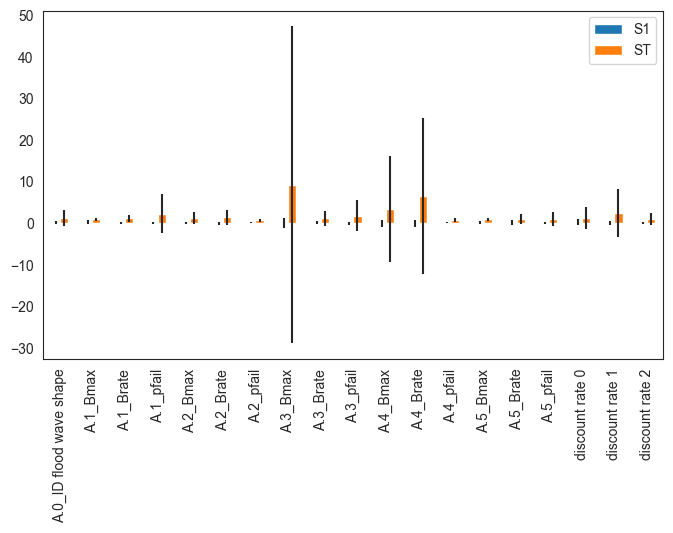

In [39]:
# Process Dataframe: Filter S1+ST

Si_filter_s1_st = {k:Si[k] for k in ['ST','ST_conf','S1','S1_conf']}
Si_df = pd.DataFrame(Si_filter_s1_st, index= problem['names'])

# Visualize Sobol indices

sns.set_style('white')
fig, ax = plt.subplots(1)

indices = Si_df[['S1','ST']]
err = Si_df[['S1_conf','ST_conf']]

indices.plot.bar(yerr=err.values.T,ax=ax)
fig.set_size_inches(8,6)
fig.subplots_adjust(bottom=0.3)
plt.show()

#### 1b Feature Scoring

In [ ]:
# Intialize Model
## uncertainties
## levers

# Perform Experiments 
## experiments
## outcomes

In [47]:
scores = feature_scoring.get_feature_scores_all(experiments, outcomes, mode=RuleInductionType.REGRESSION)

[MainProcess/INFO] model dropped from analysis because only a single category
[MainProcess/INFO] model dropped from analysis because only a single category
[MainProcess/INFO] model dropped from analysis because only a single category


<Axes: ylabel='0'>

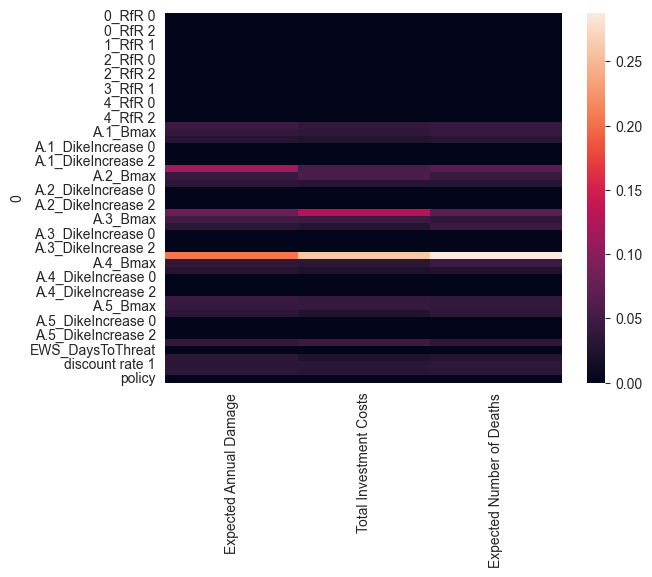

In [49]:
sns.heatmap(scores)

### Scenario Discovery


In [70]:
from ema_workbench.analysis import prim

In [136]:
# Intialize Model
## uncertainties
## levers

# Perform Experiments 
## experiments
## outcomes
#outcome_entry
#outcome_entry[logical].shape
logical

AttributeError: 'numpy.ndarray' object has no attribute 'unique'

In [180]:
# Set value range
outcome_var = 'Expected Number of Deaths'

# Set quantile or actual values
max_value = np.quantile(outcomes[outcome_var], 0.8)
min_value = np.quantile(outcomes[outcome_var], 0.2)
logical = np.array([value > max_value for value in outcomes[outcome_var]])

# define prim input parameters
x = experiments
y = logical

# run prim algorithm to find box
prim_alg = prim.Prim(x, logical, threshold=0.5)
box1 = prim_alg.find_box()

[MainProcess/INFO] model dropped from analysis because only a single category
[MainProcess/INFO] 2000 points remaining, containing 400 cases of interest
[MainProcess/INFO] mean: 0.5826086956521739, mass: 0.0575, coverage: 0.1675, density: 0.5826086956521739 restricted_dimensions: 13


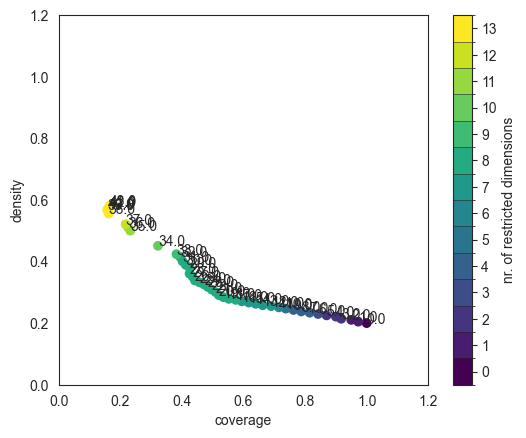

In [181]:
import matplotlib.pyplot as plt
 
box1.show_tradeoff(annotated=True)
plt.show()

coverage    0.870000
density     0.225097
id          5.000000
mass        0.773000
mean        0.225097
res_dim     2.000000
Name: 5, dtype: float64

              box 5                             
                min       max qp value  qp value
A.2_pfail  0.000353  0.855786      NaN  0.085502
A.3_pfail  0.000209  0.902409      NaN  0.146105



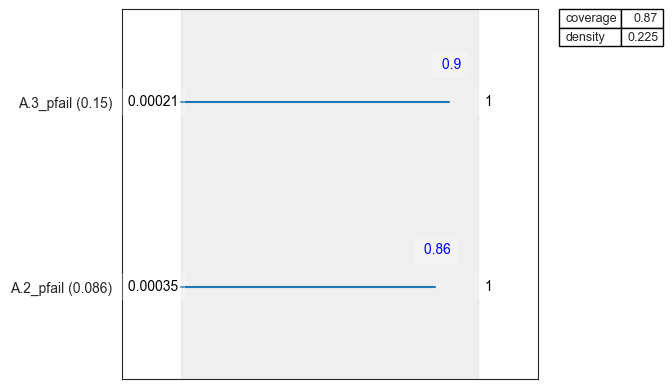

In [188]:
box1.inspect(5)
box1.inspect(5, style='graph')
plt.show()

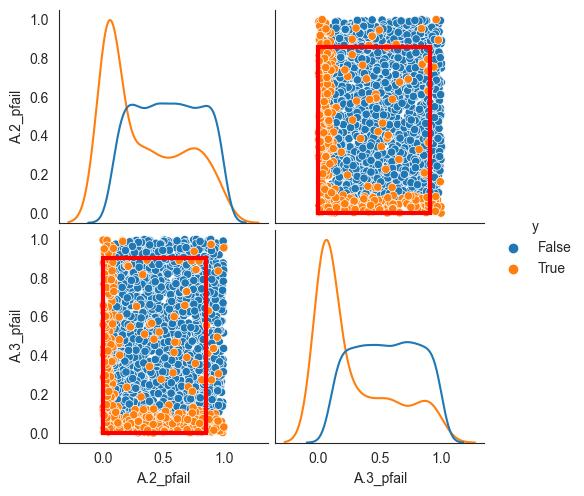

In [190]:
box1.select(5)
fig = box1.show_pairs_scatter()
plt.show()